# Sonar Machine Learning Project
## Dataset: 
https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks

## Info on Dataset:
https://machinelearningmastery.com/standard-machine-learning-datasets/

## What is a binary (2-class) classification problem?

A binary (2-class) classification problem is a problem in which there are only two possible outcomes.

## Notebook Setup

In [149]:
# Third-party imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Model Imports

#import used for tuning hyperparameters
from sklearn.model_selection import GridSearchCV
#import used for splitting the data
from sklearn.model_selection import train_test_split
#import logistic regression model
from sklearn.linear_model import LogisticRegression
#import the decision tree model
from sklearn import tree
#import used for visualizing a decision tree
from sklearn.tree import plot_tree, export_text
#import random forest model
from sklearn.ensemble import RandomForestClassifier
#import support vector machine model
from sklearn import svm
#import k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

In [103]:
#loads seaborns default settings
sns.set()

## Load data
Let's load the sonar dataset using pandas

In [104]:
#creates a variable df
#inputs dataset into df
df = pd.read_csv('sonar.csv')

In [105]:
#renames the column with the target values to "target"
df = df.rename({'R': 'target'}, axis=1)

## What is an imbalanced dataset?

It is when there is more data for one class than another.

In [106]:
#creates a variable occurence_unique
#displays the number of each unique values occurence
occurence_unique = df['target'].value_counts()
occurence_unique

target
M    111
R     96
Name: count, dtype: int64

<Axes: title={'center': 'Count (target)'}, xlabel='target'>

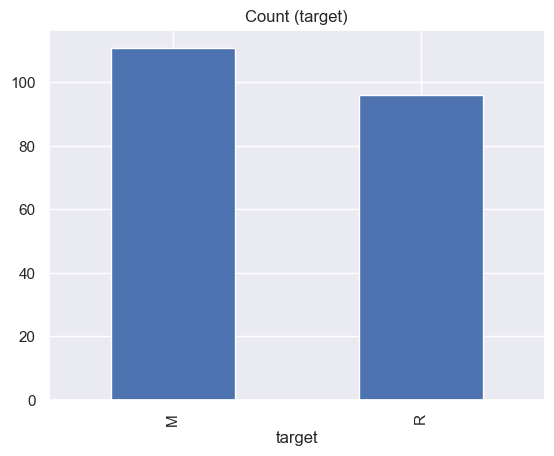

In [107]:
#creates a visual that displays the imbalance in data
occurence_unique.plot(kind='bar', title='Count (target)')

We can see that there are more data on mines compared to rocks which means that the program will be more prepared for a mine rather than a rock during testing.

# Train test split
You always want to evaluate your final model on a test set that hasn't been used at all inthe training proccess. So we'll split off a test set here.

In [108]:
#creates two variables df_train and df_test
#puts 75% of the dataset into df_train
#puts 25% of the dataset into df_test
df_train, df_test = train_test_split(df, test_size=0.25)

In [109]:
#check to make sure the data was split correctly
df_train.shape

(155, 61)

In [110]:
#check to make sure the data was split correctly
df_test.shape

(52, 61)

In [111]:
#check to make sure the data was split correctly
df_train.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,target
188,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M
186,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
11,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
94,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R
13,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062,R


# Prepare our data for modeling
This involves spitting the data back out into plain NumPy arrays

In [112]:
#creates two variables x_train and y_train
#x_train contains all columns excluding the target column
#y_train only the target column
x_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values

#creates four variables xt, xv, yt, yv
#xt stands for "x_train", and xv stands for "x_validation"
#75% of the training data goes into xt and yt while 25% of the training data goes into xv and yv
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

#creates a x_test and y_test variable
#x_test stores all the columns besides the target column from the df_test dataframe
#y_test stores the target column from the df_test dataframe
x_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Modeling - Logistic Regression

## What is a logistic regression model?
Logistic regression allows you to take in multiple inputs and spits out the probability of being one class or the other. This is very useful when it's only two classes as it can either be one or the other (0 or 1). The area between 0 and 1 is where the machine is uncertain if it's one or the other but it will give you the answer with the highest probability.

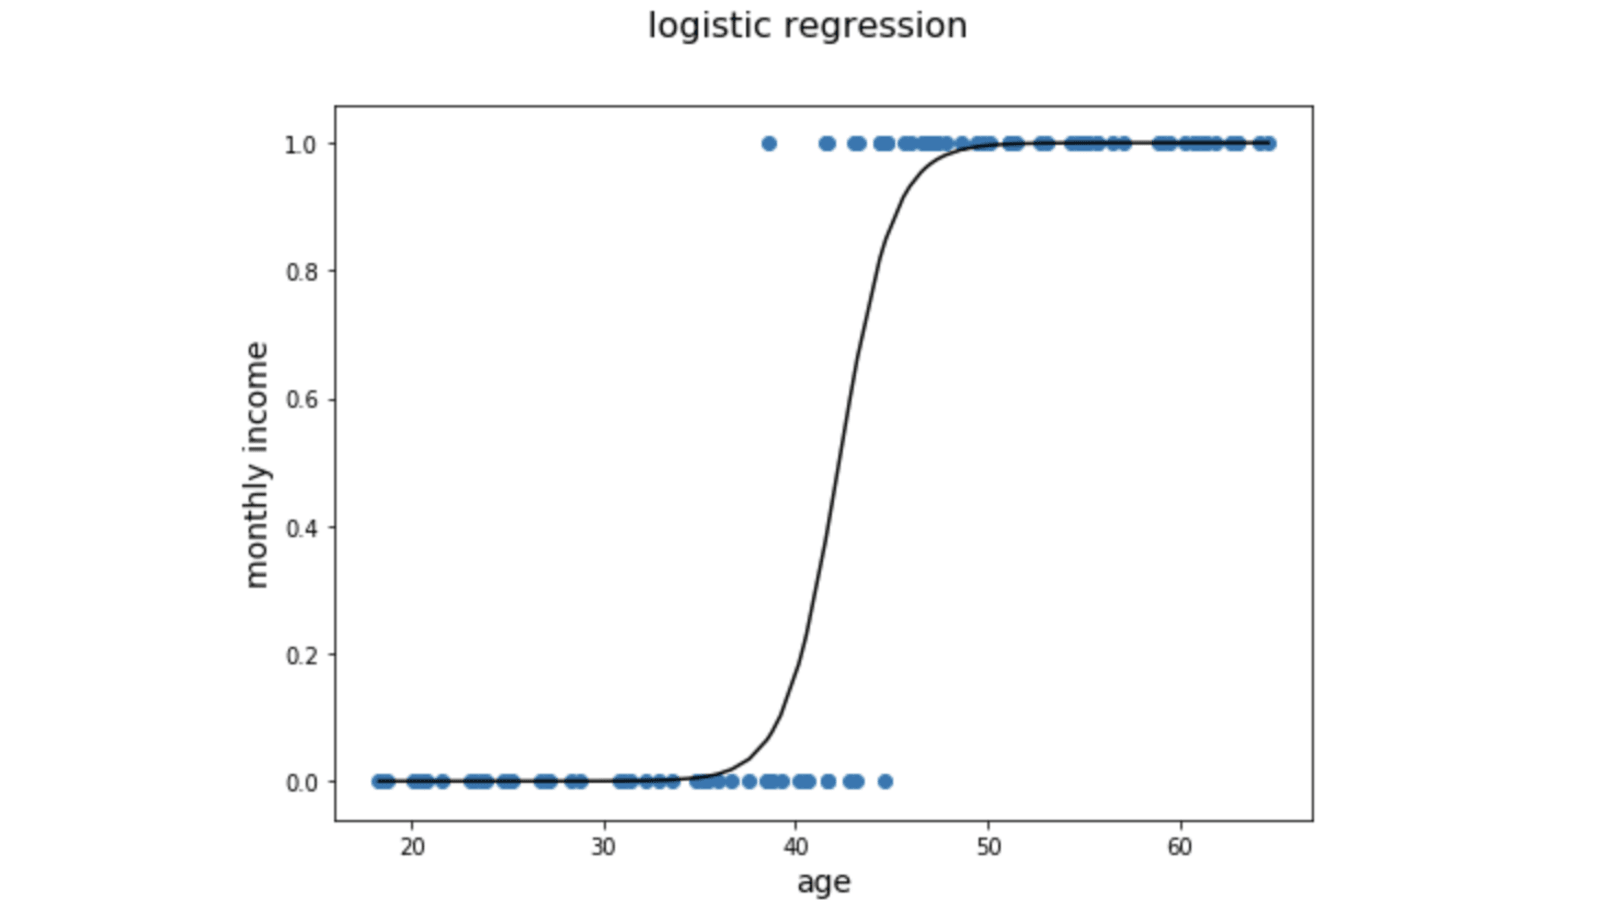

In [113]:
#creates a logistic regression where the data is iterated until it's converge or after 200 iteratioins
model = LogisticRegression()

In [114]:
param_grid = {
    'C': range(1, 10)
}

grid = GridSearchCV(model, param_grid, cv=5)
# fitting the model for grid search
grid.fit(xt, yt)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 10)})

In [115]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 2}
LogisticRegression(C=2)


## Train our final model using our full Training Dataset

In [116]:
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [117]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
logistic_regression_test_set_accuracy = np.mean(test_set_correctly_classified)

## **Logistic Regression: Final Score**

In [118]:
#prints the accuracy of the model
print(f'Test set accuracy: {logistic_regression_test_set_accuracy * 100:.2f}%')

Test set accuracy: 75.00%


# Modeling - Decision Tree

## What is a decision tree model?
A decision tree uses regression to obtain a classification through simple decisions (yes or no type questions).

![decisiontree](https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1)

In [119]:
#creates a decision tree model
model = tree.DecisionTreeClassifier()

## Hyperparameter Tuning

What is a hyperparameter?
Hyperparameters are the parameters that controls the learning process the model goes through. Tuning these parameters can increase or decrease the score of the model.

In [120]:
# defining parameter range
params_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_leaf_nodes':[10, 20, 30, 40, 50],
    'criterion': ["gini", "entropy"]
}

grid = GridSearchCV(model, params_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV 1/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.542 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.826 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10;, score=0.542 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, 

[CV 5/5] END criterion=gini, max_depth=3, max_leaf_nodes=30, min_samples_leaf=50;, score=0.522 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_leaf_nodes=30, min_samples_leaf=100;, score=0.500 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_leaf_nodes=30, min_samples_leaf=100;, score=0.522 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_leaf_nodes=30, min_samples_leaf=100;, score=0.522 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_leaf_nodes=30, min_samples_leaf=100;, score=0.522 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_leaf_nodes=30, min_samples_leaf=100;, score=0.522 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_leaf_nodes=40, min_samples_leaf=5;, score=0.583 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_leaf_nodes=40, min_samples_leaf=5;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_leaf_nodes=40, min_samples_leaf=5;, sco

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=3)

In [121]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=20,
                       min_samples_leaf=5)


## Train our final model using our full Training Dataset

In [122]:
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [123]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
decision_tree_test_set_accuracy = np.mean(test_set_correctly_classified)

## **Decision Tree: Final Score**

In [124]:
print(f'Test set accuracy: {decision_tree_test_set_accuracy * 100:.2f}%')

Test set accuracy: 69.23%


# Modeling - Random Forest

## What is a random forest?
A random forest model is a more extreme version of the decision tree model as it makes multiple decision trees and picks from the majority.

![randomforest](https://serokell.io/files/vz/vz1f8191.Ensemble-of-decision-trees.png)

In [125]:
#creates a random forest model
model = RandomForestClassifier()

## Hyperparamter Tuning
I have created two sets of parameters, one takes significantly longer to run compared to the other however it may lead to better results.

In [126]:
#defining parameter range
#run time: long
# param_grid = {
#     'n_estimators': [200, 500],
#     'max_depth' : [4,5,6,7,8],
#     'min_samples_split':[10, 20, 30, 40, 50],
#     'min_samples_leaf': [10, 20, 30, 40, 50],
#     'criterion' :['gini', 'entropy']
# }

#OR

#run time short
param_grid = {
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV 1/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.625 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.826 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.870 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.913 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.783 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.667 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.870 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.913 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.913 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.826 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.667 total t

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=3)

In [127]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
RandomForestClassifier(max_depth=6, n_estimators=200)


## Train our final model using our full Training Dataset

In [128]:
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [129]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
random_forest_test_set_accuracy = np.mean(test_set_correctly_classified)

## Random Forest: Final Score

In [130]:
print(f'Test set accuracy: {random_forest_test_set_accuracy * 100:.2f}%')

Test set accuracy: 78.85%


# Modeling - Support Vector Machines

## What is Support Vector Machines (SVM)?

Support Vector Machines are more accurate compared to other regressions like logistic regression and decision trees. This model uses very specific and accurate lines to differentiate one class from another.

![SVM](https://miro.medium.com/v2/resize:fit:600/format:webp/0*9jEWNXTAao7phK-5.png)

In [131]:
model = svm.SVC()

## Hyperparameter Tuning

In [132]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [133]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


## Train our final model using our full Training Dataset

In [134]:
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [135]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
svm_test_set_accuracy = np.mean(test_set_correctly_classified)

## Support Vector Machines: Final Score

In [136]:
print(f'Test set accuracy: {svm_test_set_accuracy * 100:.2f}%')

Test set accuracy: 84.62%


# Modeling - K-Nearest Neighbors

## What is K-Nearest Neighbors?
This model uses neighboring points from the training sets to determine each specific point in the validationa and test sets. As demonstrated by the image below.

![kNN](https://miro.medium.com/v2/resize:fit:1200/1*T8Pnw0kiVbrPGnqnB2I_Zw.jpeg)

In [137]:
model = KNeighborsClassifier()

## Hyperparamter Tuning

In [138]:
# defining parameter range
param_grid = {'n_neighbors': [1, 5, 10, 25],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
              'n_jobs': [1, 2, 3, 4, 5]}

grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.833 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.783 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.826 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.708 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.783 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_

[CV 1/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=5;, score=0.708 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=5;, score=0.783 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=5;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=10;, score=0.583 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=10;, score=0.565 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=10;, score=0.696 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=10;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_jobs=2, n_neighbors=25;, score=0.542 total time= 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 5, 10, 25]},
             scoring='accuracy', verbose=3)

In [139]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'algorithm': 'ball_tree', 'n_jobs': 1, 'n_neighbors': 1}
KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=1)


## Train our final model using our full Training Dataset

In [140]:
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [141]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
k_nearest_neighbors_test_set_accuracy = np.mean(test_set_correctly_classified)

## K-Nearest Neighbors: Final Score

In [142]:
print(f'Test set accuracy: {k_nearest_neighbors_test_set_accuracy * 100:.2f}%')

Test set accuracy: 78.85%


# Model Comparison

### Logistic Regression Accuracy

In [143]:
#prints the accuracy of the model
print(f'Test set accuracy: {logistic_regression_test_set_accuracy * 100:.2f}%')

Test set accuracy: 75.00%


### Decision Tree Accuracy

In [144]:
#prints the accuracy of the model
print(f'Test set accuracy: {decision_tree_test_set_accuracy * 100:.2f}%')

Test set accuracy: 69.23%


### Random Forest Accuracy

In [145]:
#prints the accuracy of the model
print(f'Test set accuracy: {random_forest_test_set_accuracy * 100:.2f}%')

Test set accuracy: 78.85%


### Support Vector Machines

In [146]:
#prints the accuracy of the model
print(f'Test set accuracy: {svm_test_set_accuracy * 100:.2f}%')

Test set accuracy: 84.62%


## K-Nearest Neighbors

In [147]:
#prints the accuracy of the model
print(f'Test set accuracy: {k_nearest_neighbors_test_set_accuracy * 100:.2f}%')

Test set accuracy: 78.85%


We can see that Support Vector Machines, Random Forest, and K-Nearest Neighbors models tend to do better compared to the Decision Tree and Logistic Regression models.